<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 18</h1>
</div>

# 1. Binary trees
# 2. Binary search trees


## Final exam information

The final will be on *December 17th* from 9-11am

## Binary trees

## Trees vs Graphs

Trees are a special type of graph with a few key features
* Hierarchical structure with a root node
* Acyclic
* Parent and child nodes with well-defined ancestry (every node besides the root has only one parent)
* Only n-1 edges for n nodes
* May constrain the number of children (in a binary tree each parent can have at most two children)

## Why are trees useful?

* Anything with a hierarchical data structure (File systems, family trees, HTML DOM structure)
* Data compression (huffman coding builds a binary tree for the frequency of characters to perform compression)
* Compilers use syntax trees to represent the structure of a program
* Prefix trees (Tries) are used in spell checking, dictionary search, internet routing
* Databases use tree data structures for their indexing to efficiently search and retrieve data
* Merkle trees allow for efficient verification of large data structures, useful in P2P settings (Bitcoin, BitTorrent, etc)
* Spanning trees are important for optimizing routing on networks
* Decision trees!
* Sorting Algorithms!
* Search Algorithms!

A general tree:
<div align="center">
<img src="tree-example.jpg" alt="[non-binary tree example]" width="100%">
</div>

<div align="center">
<img src="binary-tree-example.jpg" alt="[binary tree example]" width="70%">
</div>

## Important Terms

* Root - the topmost node of the tree, only node without a parent
* Ancestor vs Descendant - If two nodes are connected, the node that is closer to the root is the ancestor of the other node, similarly the further node its descendant
* Parent vs Child - A nodes immediate descendant is its child, and a nodes immediate ancestor is its parent
* Leaf - a node with no child nodes
* Subtree - A subset of the tree, with a parent of the original tree becoming the root of the subtree
* Depth - the greatest number of descendants between the root and a leaf node
* Level - the number of edges between a node and the root. Root node has level 0
* Sibling - nodes that share the same parent

## Why are binary trees useful?

* Simple to analyze
* Many algorithms boil down to a series of "True/False" decisions that map well to binary trees
* Ordering in particular fits well (either you are "<" or you aren't)
* Easy to use with recursive algorithms 

## What types of binary trees are there?

* Complete (every level except the last one are full)
* Perfect (all leaves are at the same level, all interior nodes have 2 children)
* Balanced (left and right subtrees differ by at most 1 level)
* Special
  * Binary Heaps
  * Binary Search Trees
  
## Any other interesting trees?

* Prefix trees or tries

## Using Vectors to implement a Binary Tree

In [3]:
#[derive(Debug)]
struct TreeNode {
    value: usize,
    left: Option<usize>,
    right: Option<usize>,
}

impl TreeNode {
    fn new(value: usize) -> Self {
        TreeNode {
            value,
            left: None,
            right: None,
        }
    }
}

In [4]:
#[derive(Debug)]
struct BinaryTree {
    nodes: Vec<TreeNode>,
    root: Option<usize>,
}

impl BinaryTree {
    fn new() -> Self {
        BinaryTree { nodes: Vec::new(), root: None }
    }

    fn insert(&mut self, value: usize) {
        let new_node_index = self.nodes.len();
        self.nodes.push(TreeNode::new(value));

        match self.root {
            Some(root_index) => self.insert_at(root_index, new_node_index),
            None => self.root = Some(new_node_index),
        }
    }

    fn insert_at(&mut self, current_index: usize, new_node_index: usize) {
        let current_node = &mut self.nodes[current_index];
        if current_node.left.is_none() {
            current_node.left = Some(new_node_index);
        } else if current_node.right.is_none() {
            current_node.right = Some(new_node_index);
        } else {
            // Insert in left subtree for simplicity, could be more complex to keep balanced
            let left = current_node.left.unwrap();
            self.insert_at(left, new_node_index);
        }
    }
    
}


In [5]:
let mut tree = BinaryTree::new();
tree.insert(1);
tree.insert(2);
tree.insert(3);
tree.insert(6);
tree.insert(7);
tree.insert(11);
tree.insert(23);
tree.insert(34);

println!("{:#?}", tree);


BinaryTree {
    nodes: [
        TreeNode {
            value: 1,


<div align="center">
<img src="binary_tree.png" alt="[binary tree]" width="100%">
</div>

This isn't super readable, is there a better way to output this tree?

## Tree Traversal

There are several ways to traverse trees using algorithms we have seen before:
* Using BFS
  * Level-order Traversal
* Using DFS
  * Pre-order Traversal
  * In-order Traversal
  * Post Order Traversal

We are going to use level-order traversal to visit each level of the tree in order

## Level-Order Traversal

* Create an empty queue
* Add the root of tree to queue
* While the queue is not empty
  * Remove node from queue and visit it
  * Add the left child of node to the queue if it exists
  * Add the right child of node to the queue if it exists
  
 

In [6]:
use std::collections::VecDeque;
fn level_order_traversal(tree: &BinaryTree) {
  if let Some(root_index) = tree.root {
    let mut queue = VecDeque::new();
    queue.push_back(root_index);
    while let Some(node_index) = queue.pop_front() {
      let node = &tree.nodes[node_index];
      println!("{}", node.value);
      if let Some(left_index) = node.left {
        queue.push_back(left_index);
      }
      if let Some(right_index) = node.right {
        queue.push_back(right_index);
      }
    }
  }
}

let mut tree2 = BinaryTree::new();
tree2.insert(1);
tree2.insert(2);
tree2.insert(3);
tree2.insert(6);
tree2.insert(7);
tree2.insert(11);
tree2.insert(23);
tree2.insert(34);
level_order_traversal(&tree2);

            left: Some(
                1,
            ),
            right: Some(
                2,
            ),
        },
        TreeNode {
            value: 2,
            left: Some(
                3,
            ),
            right: Some(
                4,
            ),
        },
        TreeNode {
            value: 3,
            left: None,
            right: None,
        },
        TreeNode {
            value: 6,
            left: Some(
                5,
            ),
            right: Some(
                6,
            ),
        },
        TreeNode {
            value: 7,
            left: None,
            right: None,
        },
        TreeNode {
            value: 11,
            left: Some(
                7,
            ),
            right: None,
        },
        TreeNode {
            value: 23,
            left: None,
            right: None,
        },
        TreeNode {
            value: 34,
            left: None,
            right: None,
   

In [7]:
// Slightly more complex version that prints each level on a different line
use std::collections::VecDeque;
fn level_order_traversal2(tree: &BinaryTree) {
  if let Some(root_index) = tree.root {
    let mut queue = VecDeque::new();
    queue.push_back(root_index);
    while !queue.is_empty() {
      let level_size = queue.len();
        for _ in 0..level_size {
          if let Some(node_index) = queue.pop_front() {
            let node = &tree.nodes[node_index];
            print!("{} ", node.value);

            if let Some(left_index) = node.left {
              queue.push_back(left_index);
            }
            if let Some(right_index) = node.right {
              queue.push_back(right_index);
            }
        }
      }
      println!(); // New line after each level
    }
  }
}

let mut tree2 = BinaryTree::new();
tree2.insert(1);
tree2.insert(2);
tree2.insert(3);
tree2.insert(6);
tree2.insert(7);
tree2.insert(11);
tree2.insert(23);
tree2.insert(34);
level_order_traversal2(&tree2);

6
7
11
23
34
1 
2 3 
6 7 
11 23 


## Pre-Order Traversal

Often used when making a copy of a tree, uses DFS

Algorithm:
* Visit the current node
* Traverse the left subtree
* Traverse the right subtree


In [8]:
fn pre_order_traversal(tree: &BinaryTree, node_index: Option<usize>) {
  if let Some(index) = node_index {
    let node = &tree.nodes[index];
    println!("{}", node.value);
    pre_order_traversal(tree, node.left);
    pre_order_traversal(tree, node.right);
  }
}

pre_order_traversal(&tree2, tree2.root)

34 
1
2
6
11
34
23
7
3


()

## What about In-Order and Post-Order Traversals?

In-Order traveral (Good for accessing the elements of the tree in sorted order)
* Visit the left child
* Visit the current node
* Visit the right child

Post-Order traversal (Good for deleting the tree or parts of it, must delete children before parents):
* Visit the right child
* Visit the left child
* Visit the current node


## Binary search trees

* Organize data into a binary tree
  * Similar to binary heaps

<div align="center">
<img src="sample_tree.png" alt="[sample tree]" width="37%">
</div>

* Invariant at each node:
  * all left descendants${}\le{}$parent
  * parent${}\le{}$all right descendants

<div align="center">
<img src="relationship.png" alt="[sample tree]" width="37%">
</div>

* Compared to binary heaps:
  * different ordering of elements

## Basic operations: find a key $k$

How can we do this?

* Descend recursively from the root until $k$ found or stuck:
  * If $k<{}$value at the current node, go left
  * If $k>{}$value at the current node, go right

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Basic operations: insert a key $k$

How can we do this?

* Keep descending from the root until you leave the tree
  * If $k\le{}$value at the current node, go left
  * If $k>{}$value at the current node, go right
* Create a new node containing $k$ there

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Basic operations: delete a node

How can we do this?

* More complicated: need to find a replacement
* If the node is a leaf: nothing to do
* If only one child: move the child up
* Otherwise:
  * find the **rightmost** descendant in the **left** subtree
  * it will have at most one child

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Cost of these operations?

<div align="center">
    <b>$O($depth of the tree$)$</b>

**Bad news:** the depth can be made proportional to $n$, the number of nodes

**Good news:** smart ways to make the depth $O(\log n)$

## Balanced binary search trees

There are smart ways to rebalance the tree!

* Depth: $O(\log n)$



# Binary search trees cont'd
# Applications (range searching)
# Rust: `BTreeMap` and `BTreeSet`
# Tries (Prefix Trees)


In [9]:
#[derive(Debug)]
struct TreeNode {
    value: usize,
    left: Option<usize>,
    right: Option<usize>,
}

impl TreeNode {
    fn new(value: usize) -> Self {
        TreeNode {
            value,
            left: None,
            right: None,
        }
    }
}

#[derive(Debug)]
struct BinaryTree {
    nodes: Vec<TreeNode>,
    root: Option<usize>,
}

impl BinaryTree {
    fn new() -> Self {
        BinaryTree { nodes: Vec::new(), root: None }
    }

    fn insert(&mut self, value: usize) {
        let new_node_index = self.nodes.len();
        self.nodes.push(TreeNode::new(value));

        match self.root {
            Some(root_index) => self.insert_at(root_index, new_node_index, value),
            None => self.root = Some(new_node_index),
        }
    }

    fn insert_at(&mut self, current_index: usize, new_node_index: usize, value:usize) {
        let current_node = &mut self.nodes[current_index];
        if current_node.value < value {
            if current_node.right.is_none() {
                current_node.right = Some(new_node_index);
            } else {
                let right = current_node.right.unwrap();
                self.insert_at(right, new_node_index, value);
            }
        } else {
            if current_node.left.is_none() {
                current_node.left = Some(new_node_index);
            } else {
                let left = current_node.left.unwrap();
                self.insert_at(left, new_node_index, value);
            }
        }
    }
}

let mut tree = BinaryTree::new();
tree.insert(1);
tree.insert(2);
tree.insert(3);
tree.insert(6);
tree.insert(7);
tree.insert(11);
tree.insert(23);
tree.insert(34);
println!("{:#?}", tree);


BinaryTree {
    nodes: [
        TreeNode {
            value: 1,
            left: None,
            right: Some(
                1,
            ),
        },
        TreeNode {
            value: 2,
            left: None,
            right: Some(
                2,
            ),
        },
        TreeNode {
            value: 3,
            left: None,
            right: Some(
                3,
            ),
        },
        TreeNode {
            value: 6,
            left: None,
            right: Some(
                4,
            ),
        },
        TreeNode {
            value: 7,
            left: None,
            right: Some(
                5,
            ),
        },
        TreeNode {
            value: 11,
            left: None,
            right: Some(
                6,
            ),
        },
        TreeNode {
            value: 23,
            left: None,
            right: Some(
                7,
            ),
        },
        TreeNode {
        

**Last time:** Unbalanced binary search trees can be inefficient!

## Balanced binary search trees

There are smart ways to rebalance the tree!

* Depth: $O(\log n)$

* Usually additional information has to be kept at each node

* Popular examples:
  * Red–black trees
  * AVL trees
  * BTrees (Used in Rust)
  * ...
  
  Fundamentally they all support rebalancing operations using some form of tree rotation.

## Basic operations: rebalance a tree

How can we do this?

* Quite a bit more complicated
* Basic idea. Find the branch that has gotten too long
  * Swap the parent with the child that is at the top of the branch by making the child the parent and the parent the child
  * If you picked a left child take the right subtree and make it a left child of the old parent
  * if you picked a right child take left subtree and make it a right child of the old parent
  
<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>


## A simple way to rebalance a binary tree

### First do an in-order traversal to get the nodes in sorted order
### Then use the middle of the sorted vector to be the root of the tree and recursively build the rest

In [10]:
impl BinaryTree {
    fn in_order_traversal(&self, node_index: Option<usize>)->Vec<usize> {
        let mut u: Vec<usize> = vec![];
        if let Some(index) = node_index {
            let node = &self.nodes[index];
            u = self.in_order_traversal(node.left);
            let mut v: Vec<usize> = vec![node.value];
            let mut w: Vec<usize> = self.in_order_traversal(node.right);
            u.append(&mut v);
            u.append(&mut w);
        }
        return u;
    }
}



In [11]:
let z = tree.in_order_traversal(tree.root);
println!("{:?}", z);

[1, 2, 3, 6, 7, 11, 23, 34]


In [12]:
impl BinaryTree {    
    fn balance_bst(&mut self, v: &[usize], start:usize, end:usize) -> Option<usize> {
        if start >= end {
            return None;
        }
        let mid = (start+end) / 2;
        let node_index = self.nodes.len();
        self.insert(v[mid]);
        self.nodes[node_index].left = self.balance_bst(v, start, mid);
        self.nodes[node_index].right = self.balance_bst(v, mid+1, end);
        Some(node_index)
    }
}



In [13]:
let mut bbtree = BinaryTree::new();
bbtree.balance_bst(&z, 0, z.len());
println!("{:#?}", bbtree);
println!("{:?}", level_order_traversal2(&bbtree));

BinaryTree {
    nodes: [
        TreeNode {
            value: 7,
            left: Some(
                1,
            ),
            right: Some(
                5,
            ),
        },
        TreeNode {
            value: 3,
            left: Some(
                2,
            ),
            right: Some(
                4,
            ),
        },
        TreeNode {
            value: 2,
            left: Some(
                3,
            ),
            right: None,
        },
        TreeNode {
            value: 1,
            left: None,
            right: None,
        },
        TreeNode {
            value: 6,
            left: None,
            right: None,
        },
        TreeNode {
            value: 23,
            left: Some(
                6,
            ),
            right: Some(
                7,
            ),
        },
        TreeNode {
            value: 11,
            left: None,
            right: None,
        },
        TreeNode {
        

## Why use binary search trees?

* Hash maps and hash sets give us $O(1)$ time operations?

### Reason 1: 

* Good worst case behavior: no need for a good hash function

### Reason 2:
* Can answer efficiently questions such as:
  * What is the smallest/greatest element?
  * What is the smallest element greater than $x$?
  * List all elements between $x$ and $y$
  

## Example: find the smallest element greater than $x$

**Question:** How can you list all elements in order in $O(n)$ time?

<br>
<br>
<div align="center">
    <b>[Work out on the board]</b>
</div>


**Answer:** recursively starting from the root

* visit left subtree
* output current node
* visit right subtree

**Outputting smallest element greater than $x$:**

* Like above, ignoring whole subtrees smaller than $x$
* Will get the first element greater than $x$ in $O(\log n)$ time

For balanced trees: listing $t$ first greater elements takes $O(t + \log n)$ time

## Binary search trees in Rust's standard library?

* Not exactly

* For efficiency reasons, $B$-trees:
  * generalization of binary trees
  * between $B$ and $2B$ keys in a node
  * corresponding number of subtrees
  
What does the B stand for?

<em> Invented by Bayer and McCreight at Boeing.  Suggested explanations have been Boeing, balanced, broad, bushy, and Bayer.  McCreight has said that "the more you think about what the B in B-trees means, the better you understand B-trees. </em>

Where can you meet $B$-trees
* Traditionally, very popular in databases
* Interesting that now considered more efficient for in memory operations

## `std::collections::BTreeSet` and `...::BTreeMap`

Sets and maps, respectively

In [14]:
// let's create a set
use std::collections::BTreeSet;
let mut set: BTreeSet<i32> = BTreeSet::new();
set.insert(11);
set.insert(7);
set.insert(5);
set.insert(23);
set.insert(25);

In [15]:
// listing a range
set.range(7..25).for_each(|x| println!("{}", x));

7
11
23


In [16]:
// listing a range: another way of specifying it
use std::ops::Bound::{Included,Excluded};
set.range((Excluded(5),Included(11))).for_each(|x| println!("{}", x));

7
11


In [17]:
// Iterating through the items is the in-order traversal that will give you sorted output
for i in &set {
    println!("{}", *i);
}

5
7
11
23
25


()

In [18]:
// let's make a map now
use std::collections::BTreeMap;
// We can rely on type inference to avoid having to fully write out the types
let mut map = BTreeMap::new();
map.insert("DS120", "Foundations of Data Science I");
map.insert("DS121", "Foundations of Data Science II");
map.insert("DS122", "Foundations of Data Science III");
map.insert("DS210", "Programming for Data Science");
map.insert("DS310", "Data Mechanics");

In [19]:
// Try to find a course
if !map.contains_key("DS111") {
    println!("Course not found");
}

Course not found


()

In [20]:
for (course, name) in &map {
    println!("{course}: \"{name}\"");
}

DS120: "Foundations of Data Science I"
DS121: "Foundations of Data Science II"
DS122: "Foundations of Data Science III"
DS210: "Programming for Data Science"
DS310: "Data Mechanics"


()

In [21]:
// listing a range
map.range("DS000".."DS199").for_each(|(x,y)| println!("{}: \"{}\"", x, y));

DS120: "Foundations of Data Science I"
DS121: "Foundations of Data Science II"
DS122: "Foundations of Data Science III"


# Trie

A very efficient data structure for dictionary search, word suggestions, error corrections etc.

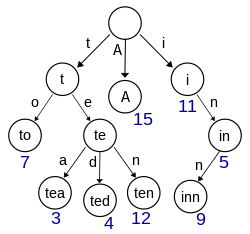

Available in Rust as an external create https://docs.rs/trie-rs/latest/trie_rs/


In [22]:
:dep trie-rs="0.1.1"
fn testme() {
    use std::str;
    use trie_rs::TrieBuilder;
    let mut builder = TrieBuilder::<u8>::new();  
    
    builder.push("to");
    builder.push("tea");
    builder.push("ted");
    builder.push("ten");
    builder.push("teapot");
    builder.push("in");
    builder.push("inn");
    let trie = builder.build();
    let results_in_u8s: Vec<Vec<u8>> = trie.predictive_search("te");
    let results_in_str: Vec<&str> = results_in_u8s
        .iter()
        .map(|u8s| str::from_utf8(u8s).unwrap())
        .collect();
    println!("{:?}", results_in_str);
}

testme();


The type of the variable tree2 was redefined, so was lost.
The type of the variable bbtree was redefined, so was lost.
The type of the variable tree was redefined, so was lost.


["tea", "teapot", "ted", "ten"]


### Most likely your spellchecker is based on a trie

* If your word is not in the trie do the following:
  * Step 1: Find the largest prefix that is present and find the trie words with that prefix
  * Step 2: Delete the first letter from your word and redo Step 1
  * Step 3: Insert a letter (for all letters) to the beginning of the word and redo Step 1
  * Step 4: Replace the beginning letter with a different one (for all letters) and redo Step 1
  * Step 5: Transpose the first two letters and redo Step 1
  * Step 6: Collect all words from Steps 1-5 sort by frequency of occurrence and present top 3-5 to user